# NETFLIX Exploratory Data Analysis (EDA)

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [10]:
df= pd.read_csv(r'E:\Resume Project\Netflix(EDA)\netflix_titles.csv')

In [11]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Data Cleaning

In [13]:
# Dropping Directors and Cast
df.drop(['director', 'cast'], axis=1, inplace=True)

In [14]:
df['date'] = pd.to_datetime(df['date_added'])
df['year'] = df['date'].apply(lambda datetime: datetime.year)
df['month'] = df['date'].apply(lambda datetime: datetime.month)

In [15]:
rating_age_groups = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_group'] = df['rating'].replace(rating_age_groups)

In [16]:
# Filling Unknown in Missing Cells
df['country'].fillna('Unknown', inplace=True)

# Counting just the first country
df['country'] = df['country'].apply(lambda x: x.split(",")[0])
df['country'].value_counts()

United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: country, Length: 87, dtype: int64

In [17]:
df = df.dropna()

In [18]:
df['year'] = df['year'].astype('int')

years = [2016, 2017, 2018, 2019, 2020, 2021]
df = df[df['year'].isin(years)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8652 non-null   object        
 1   type          8652 non-null   object        
 2   title         8652 non-null   object        
 3   country       8652 non-null   object        
 4   date_added    8652 non-null   object        
 5   release_year  8652 non-null   int64         
 6   rating        8652 non-null   object        
 7   duration      8652 non-null   object        
 8   listed_in     8652 non-null   object        
 9   description   8652 non-null   object        
 10  date          8652 non-null   datetime64[ns]
 11  year          8652 non-null   int32         
 12  month         8652 non-null   float64       
 13  age_group     8652 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(10)
memory usage: 980.1+ KB

In [20]:
df

show_id     type                  title        country  \
0         s1    Movie   Dick Johnson Is Dead  United States   
1         s2  TV Show          Blood & Water   South Africa   
2         s3  TV Show              Ganglands        Unknown   
3         s4  TV Show  Jailbirds New Orleans        Unknown   
4         s5  TV Show           Kota Factory          India   
...      ...      ...                    ...            ...   
8802   s8803    Movie                 Zodiac  United States   
8803   s8804  TV Show            Zombie Dumb        Unknown   
8804   s8805    Movie             Zombieland  United States   
8805   s8806    Movie                   Zoom  United States   
8806   s8807    Movie                 Zubaan          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description       date  year  \
0     As her father nears the end of his life, filmm... 2021-09-25  2021   
1     After crossing paths at a party, a Cape Town t... 2021-09-24  2021   
2     To protect his family from a powerful drug lor... 2021-09-24  2021   
3     Feuds, flirtations and toilet talk go down amo... 2021-09-24  2021   
4     In a city of coaching centers known to train I... 2021-09-24  2021   
...                                                 ...        ...   ...   
8802  A political cartoonist, a crime reporter and a... 2019-11-20  2019   
8803  While living alone in a spooky town, a young g... 2019-07-01  2019   
8804  Looking to survive in a world taken over by zo... 2019-11-01  2019   
8805  Dragged from civilian life, a former superhero... 2020-01-11  2020   
8806  A scrappy but poor boy worms his way into a ty... 2019-03-02  2019   

      month   age_group  
0       9.0       Teens  
1       9.0      Adults  
2       9.0      Adults  
3       9.0      Adults  
4       9.0      Adults  
...     ...         ...  
8802   11.0      Adults  
8803    7.0  Older Kids  
8804   11.0      Adults  
8805    1.0  Older Kids  
8806    3.0       Teens  

[8652 rows x 14 columns]

In [21]:
# Movies Dataframe
df_movies = df[df['type'] == 'Movie']

# TV Shows Dataframe
df_shows = df[df['type'] == 'TV Show']

### Exploratory Data Analysis

<AxesSubplot:title={'center':'Movies v/s TV Shows'}, xlabel='type', ylabel='count'>

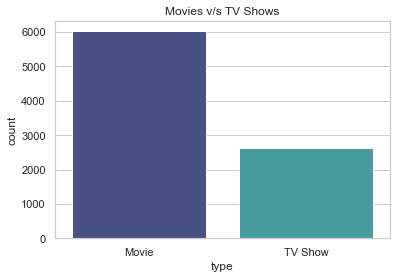

In [22]:
# Movies v/s TV Shows
sns.set_theme(style="whitegrid")
plt.title("Movies v/s TV Shows")
sns.countplot(data=df, x="type",palette= "mako")

#### Age Group Analysis

<AxesSubplot:title={'center':'Age Group Count'}, xlabel='age_group', ylabel='count'>

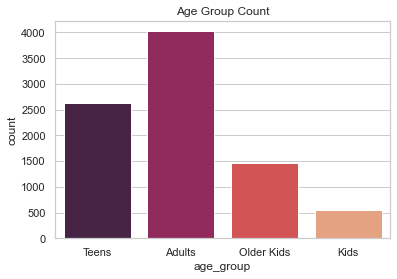

In [23]:
#Age Group Countplot
plt.title("Age Group Count")
sns.countplot(data=df, x="age_group",palette= "rocket")

<AxesSubplot:title={'center':'Distribuition of Age Group in Percentage'}, ylabel='age_group'>

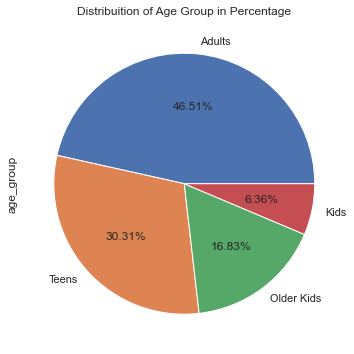

In [24]:
#Age Group Distribuition
plt.title("Distribuition of Age Group in Percentage")
df["age_group"].value_counts().plot(kind="pie",figsize=(6,6),autopct='%1.2f%%')

## CONCLUSION
#### 1) 70% of the Content on Netflix are Movies.
#### 2) 48% of the Movies released are Adult compared to 43% for Shows.
#### 3) Approx 2000 Movies and Shows are for kids.

#### Year Analysis

<AxesSubplot:title={'center':'Movies v/s TV Shows'}, xlabel='year', ylabel='count'>

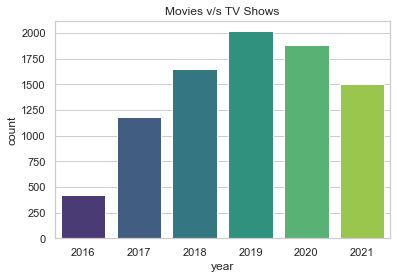

In [25]:
# Year Countplot
plt.title("Movies v/s TV Shows")
sns.countplot(data=df, x="year" ,palette= "viridis")

In [26]:
# Year and Age TreeMap
year_df = df.groupby(['year', 'age_group']).size().reset_index().rename(columns={0: 'count'})

fig = px.treemap(year_df, values='count', path=['year', 'age_group'], template='plotly_dark')
fig.update_traces(textinfo="label+percent parent")
fig.show()

## CONCLUSION
#### 1) Content on Netflix started booming from 2016.
#### 2) Peaked in 2019 with more than 2000 Movies/Shows being added on Netflix.
#### 3) New Content starts to decrease from 2020 onwards.

#### Country Analysis

In [27]:
# Top 10 Countries

country_dict = {'Country': df.groupby('country').size().sort_values(ascending=False)[:10].index,
             'Number of Movies/Shows': df.groupby('country').size().sort_values(ascending=False)[:10].values
             }

df_temp = pd.DataFrame(data=country_dict, columns=['Country', 'Number of Movies/Shows'])
fig = px.bar(df_temp, x="Country",
                   y="Number of Movies/Shows",
                   color='Number of Movies/Shows',
                   text_auto=True,
                   color_continuous_scale=[(0, "#F5F5F1"), (1, '#E50914')],
                   template='plotly_dark')

fig.show()

In [28]:
# World Map Plot

country_df = df.groupby(['country']).size().reset_index().rename(columns={0: 'count'})

fig = px.choropleth(country_df, locations="country", color="count", 
                    locationmode='country names',
                    range_color=[0,3100],
                    color_continuous_scale=[(0, "#F5F5F1"), (1, '#E50914')],
                    template='plotly_dark'
                   )

fig.update_layout(title='Content by Countries')
fig.show()

## CONCLUSION
#### 1) USA, India and UK are the top 3 and are crucial.
#### 2) More than 800 Locations are unknown.
#### 3) Most of the Countries have contributed.

####  Movie Duration Analysis

In [29]:
# Movie Duration Histplot

colors = ['#E50914', '#B81D24', '#221F1F', '#F5F5F1']

df_movies['duration'] = df_movies['duration'].astype(str).str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].astype('int')

fig = px.histogram(df_movies, x="duration", marginal="rug",
                   hover_data=['duration', 'title', 'country', 'date_added', 'age_group', 'listed_in', 'description'],
                   color_discrete_sequence=colors, template='plotly_dark')

fig.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_17316\3776015361.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Asus\AppData\Local\Temp\ipykernel_17316\3776015361.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# Duration vs Age Boxplot

fig = px.box(df_movies, x="duration", y='age_group', color='age_group', notched=True, template='plotly_dark')
fig.show()

## CONCLUSION
#### 1) Many Movies lie in the 90 - 100 minute range.
#### 2) Anything Outside the 45 - 157 minute range can be considered as an outlier.
#### 3) Order of Movie Duration (Teens > Adults > Older Kids > Kids).

# THE END